In [1]:
#We need to install opencv-python

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import module glob
import glob
#Import OpenCV-Python library
import cv2
#Import NumPy library as np
import numpy as np
#Import Random module
import random
#Import math module
import math
#Import pandas as pd
import pandas as pd
#Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#Reading all images from folder named Flowers stored in D drive
all_images=[cv2.imread(file) for file in glob.glob("D:/Flowers/*.jpg")]

number_images=len(all_images) #Calculating total number of images in folder

print(number_images) #Printing total number of images

320


In [4]:
#There are 320 images in folder. All the images will be in BGR format

In [5]:
#Converting all images from BGR to RGB

images_rgb=all_images #Initializing variable images_rgb which will store all images in RGB
#For loop for converting all images into RGB
for i in range(number_images):
    img=all_images[i] #Storing (i+1)th image in img
    images_rgb[i]=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converting (i+1)th image from BGR to RGB and storing it

all_images=[cv2.imread(file) for file in glob.glob("D:/Flowers/*.jpg")] 
#Since array images may get changed, reading all images from folder

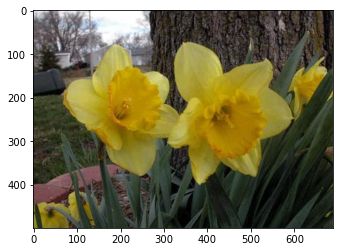

In [6]:
#Displaying 1st image

plt.imshow(images_rgb[0])

In [7]:
#Resizing all images

resize_images=all_images #Initializing variable resize_images which will store all resized images
#For loop for resizing all images
for i in range(number_images):
    img1=images_rgb[i] #Storing (i+1)th image in img1
    height=len(img1) #Computing height of (i+1)th image
    width=len(img1[0]) #Computing width of (i+1)th image
    resize_images[i]=cv2.resize(img1, (int(width/2), int(height/2))) #Resizing (i+1)th image to half of the original size

all_images=[cv2.imread(file) for file in glob.glob("D:/Flowers/*.jpg")]
#Since array images may get changed, reading all images from folder

In [8]:
#Converting all resized images to grayscale images

grayscale_images=all_images #Initializing variable grayscale_images which will store all grayscale images
#For loop for converting all resized images to grayscale
for i in range(number_images):
    img2=resize_images[i] #Storing (i+1)th resized image in img2
    img2_R=img2[:,:,0] #Extracting Red channel values of (i+1)th resized image
    img2_G=img2[:,:,1] #Extracting Green channel values of (i+1)th resized image
    img2_B=img2[:,:,2] #Extracting Blue channel values of (i+1)th resized image
    grayscale_img2=0.2126*img2_R+0.7152*img2_G+0.0722*img2_B #Converting (i+1)th resized image to grayscale image
    grayscale_images[i]=grayscale_img2 #Storing (i+1)th grayscale image

all_images=[cv2.imread(file) for file in glob.glob("D:/Flowers/*.jpg")]
#Since array images may get changed, reading all images from folder

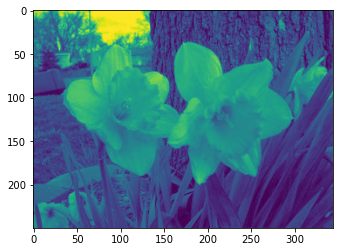

In [9]:
#Displaying 1st grayscale image

plt.imshow(grayscale_images[0])

In [10]:
#Converting all resized RGB images to HSV

#From skimage.color importing rgb2hsv
from skimage.color import rgb2hsv
images_hsv=all_images #Initializing variable images_hsv which will store all HSV images
#For loop for converting all resized RGB images to HSV
for i in range(number_images):
    img3=resize_images[i] #Storing (i+1)th resized image in img3
    rgb_to_hsv_image=rgb2hsv(img3) #Converting (i+1)th resized image from RGB to HSV
    images_hsv[i]=rgb_to_hsv_image #Storing (i+1)th HSV image

In [11]:
#Obtaining histogram values for Red Channel with 8 bins and normalizing these values

number_bin=8 #Setting number of bins as 8
array_histogram_bins_R=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_bins_R which will store histogram values for Red Channel with 8 bins
array_histogram_R_normalized=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_R_normalized which will store normalized histogram values for Red Channel with 8 bins

#For loop for obtaining histogram values for Red Channel with 8 bins and normalizing these values
for i in range(number_images):
    img4=resize_images[i] #Storing (i+1)th resized image in RGB in img4
    img4_R=img4[:,:,0] #Extracting Red channel values of (i+1)th resized image
    flatten_img4_R=img4_R.flatten() #Flattening array which stores Red channel values of (i+1)th resized image
    b=list(range(257)) #Converting range(257) into list and storing in variable b
    histogram=np.histogram(flatten_img4_R,bins=b) #Obtaining histogram for Red Channel with 256 bins
    array_histogram=histogram[0] #Obtaining histogram values for Red Channel with 256 bins
    
    #For loop for obtaining histogram values for Red Channel with 8 bins
    for k in range(number_bin):
        sum=0 #Initializing sum as 0
        for l in range(32): #32 is because 256/8=32
            a=k*32+l #Computing variable a as k*32 + l
            sum=sum+array_histogram[a] #Adding all histogram values for Red channel in (k+1)th bin
        array_histogram_bins_R[i][k]=sum #Storing addition of histogram values for Red channel in (k+1)th bin for (i+1)th image 
    maximum=np.amax(array_histogram_bins_R[i]) 
    #Computing maximum of all histogram values for Red channel with 8 bins for (i+1)th image
    minimum=np.amin(array_histogram_bins_R[i])
    #Computing minimum of all histogram values for Red channel with 8 bins for (i+1)th image
    array_histogram_R_normalized[i]=(array_histogram_bins_R[i]-minimum)/(maximum-minimum)
    #Normalizing histogram values for Red channel with 8 bins for (i+1)th image

In [12]:
#Obtaining histogram values for Green Channel with 8 bins and normalizing these values

number_bin=8 #Setting number of bins as 8
array_histogram_bins_G=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_bins_G which will store histogram values for Green Channel with 8 bins
array_histogram_G_normalized=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_G_normalized which will store normalized histogram values for Green Channel with 8 bins

#For loop for obtaining histogram values for Green Channel with 8 bins and normalizing these values
for i in range(number_images):
    img5=resize_images[i] #Storing (i+1)th resized image in RGB in img5
    img5_G=img5[:,:,1] #Extracting Green channel values of (i+1)th resized image
    flatten_img5_G=img5_G.flatten() #Flattening array which stores Green channel values of (i+1)th resized image
    b=list(range(257)) #Converting range(257) into list and storing in variable b
    histogram=np.histogram(flatten_img5_G,bins=b) #Obtaining histogram for Green Channel with 256 bins
    array_histogram=histogram[0] #Obtaining histogram values for Green Channel with 256 bins
    
    #For loop for obtaining histogram values for Green Channel with 8 bins
    for k in range(number_bin):
        sum=0 #Initializing sum as 0
        for l in range(32): #32 is because 256/8=32
            a=k*32+l #Computing variable a as k*32 + l
            sum=sum+array_histogram[a] #Adding all histogram values for Green channel in (k+1)th bin
        array_histogram_bins_G[i][k]=sum #Storing addition of histogram values for Green channel in (k+1)th bin for (i+1)th image 
    maximum=np.amax(array_histogram_bins_G[i])
    #Computing maximum of all histogram values for Green channel with 8 bins for (i+1)th image
    minimum=np.amin(array_histogram_bins_G[i])
    #Computing minimum of all histogram values for Green channel with 8 bins for (i+1)th image
    array_histogram_G_normalized[i]=(array_histogram_bins_G[i]-minimum)/(maximum-minimum)
    #Normalizing histogram values for Green channel with 8 bins for (i+1)th image

In [13]:
#Obtaining histogram values for Blue Channel with 8 bins and normalizing these values

number_bin=8 #Setting number of bins as 8
array_histogram_bins_B=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_bins_B which will store histogram values for Blue Channel with 8 bins
array_histogram_B_normalized=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_B_normalized which will store normalized histogram values for Blue Channel with 8 bins

#For loop for obtaining histogram values for Blue Channel with 8 bins and normalizing these values
for i in range(number_images):
    img6=resize_images[i] #Storing (i+1)th resized image in RGB in img6
    img6_B=img6[:,:,2] #Extracting Blue channel values of (i+1)th resized image
    flatten_img6_B=img6_B.flatten() #Flattening array which stores Blue channel values of (i+1)th resized image
    b=list(range(257)) #Converting range(257) into list and storing in variable b
    histogram=np.histogram(flatten_img6_B,bins=b) #Obtaining histogram for Blue Channel with 256 bins
    array_histogram=histogram[0] #Obtaining histogram values for Blue Channel with 256 bins
    
    #For loop for obtaining histogram values for Blue Channel with 8 bins
    for k in range(number_bin):
        sum=0 #Initializing sum as 0
        for l in range(32): #32 is because 256/8=32
            a=k*32+l #Computing variable a as k*32 + l
            sum=sum+array_histogram[a] #Adding all histogram values for Blue channel in (k+1)th bin
        array_histogram_bins_B[i][k]=sum #Storing addition of histogram values for Blue channel in (k+1)th bin for (i+1)th image 
    maximum=np.amax(array_histogram_bins_B[i])
    #Computing maximum of all histogram values for Blue channel with 8 bins for (i+1)th image
    minimum=np.amin(array_histogram_bins_B[i])
    #Computing minimum of all histogram values for Blue channel with 8 bins for (i+1)th image
    array_histogram_B_normalized[i]=(array_histogram_bins_B[i]-minimum)/(maximum-minimum)
    #Normalizing histogram values for Blue channel with 8 bins for (i+1)th image

In [14]:
#Obtaining histogram values for Hue Channel with 8 bins and normalizing these values

number_bin=8 #Setting number of bins as 8
array_histogram_bins_H=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_bins_H which will store histogram values for Hue Channel with 8 bins
array_histogram_H_normalized=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_H_normalized which will store normalized histogram values for Hue Channel with 8 bins

#For loop for obtaining histogram values for Hue Channel with 8 bins and normalizing these values
for i in range(number_images):
    img7=images_hsv[i] #Storing (i+1)th resized image in HSV in img7
    img7_H=img7[:,:,0] #Extracting Hue channel values of (i+1)th resized image in HSV
    flatten_img7_H=img7_H.flatten() #Flattening array which stores Hue channel values of (i+1)th resized image
    b=[0,1/8,2/8,3/8,4/8,5/8,6/8,7/8,1] #Storing list of values 0,1/8,2/8,3/8,4/8,5/8,6/8,7/8,1 in variable b
                                        #8 is because number of bins is 8
    histogram=np.histogram(flatten_img7_H,bins=b) #Obtaining histogram for Hue Channel with 8 bins
    array_histogram_bins_H[i]=histogram[0] #Obtaining histogram values for Hue Channel with 8 bins
    maximum=np.amax(array_histogram_bins_H[i])
    #Computing maximum of all histogram values for Hue channel with 8 bins for (i+1)th image
    minimum=np.amin(array_histogram_bins_H[i])
    #Computing minimum of all histogram values for Hue channel with 8 bins for (i+1)th image
    array_histogram_H_normalized[i]=(array_histogram_bins_H[i]-minimum)/(maximum-minimum)
    #Normalizing histogram values for Hue channel with 8 bins for (i+1)th image

In [15]:
#Obtaining histogram values for Saturation Channel with 8 bins and normalizing these values

number_bin=8 #Setting number of bins as 8
array_histogram_bins_S=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_bins_S which will store histogram values for Saturation Channel with 8 bins
array_histogram_S_normalized=np.empty((number_images,number_bin))
#Initializing 2-D array array_histogram_S_normalized which will store normalized histogram values for Saturation Channel with 8 bins

#For loop for obtaining histogram values for Saturation Channel with 8 bins and normalizing these values
for i in range(number_images):
    img8=images_hsv[i] #Storing (i+1)th resized image in HSV in img8
    img8_S=img8[:,:,1] #Extracting Saturation channel values of (i+1)th resized image in HSV
    flatten_img8_S=img8_S.flatten() #Flattening array which stores Saturation channel values of (i+1)th resized image
    b=[0,1/8,2/8,3/8,4/8,5/8,6/8,7/8,1] #Storing list of values 0,1/8,2/8,3/8,4/8,5/8,6/8,7/8,1 in variable b
                                        #8 is because number of bins is 8
    histogram=np.histogram(flatten_img8_S,bins=b) #Obtaining histogram for Saturation Channel with 8 bins
    array_histogram_bins_S[i]=histogram[0] #Obtaining histogram values for Saturation Channel with 8 bins
    maximum=np.amax(array_histogram_bins_S[i])
    #Computing maximum of all histogram values for Saturation channel with 8 bins for (i+1)th image
    minimum=np.amin(array_histogram_bins_S[i])
    #Computing minimum of all histogram values for Saturation channel with 8 bins for (i+1)th image
    array_histogram_S_normalized[i]=(array_histogram_bins_S[i]-minimum)/(maximum-minimum)
    #Normalizing histogram values for Saturation channel with 8 bins for (i+1)th image

In [16]:
#Storing dataset of noramlized histogram values of Red, Green, Blue, Hue and Saturation channels with 8 bins

number_bin=8 #Setting number of bins as 8
dataset_histogram_normalized_RGBHS=np.empty((number_images,number_bin*5))
#Initializing 2-D array dataset_histogram_normalized_RGBHS for 
#storing dataset of noramlized histogram values of Red, Green, Blue, Hue and Saturation channels with 8 bins
#number_bin*5 is because we are storing values corresponding to 5 channels

m1=number_bin #Setting m1 as number of bins
m2=2*number_bin #Setting m2 as 2 times number of bins
m3=3*number_bin #Setting m3 as 3 times number of bins
m4=4*number_bin #Setting m4 as 4 times number of bins
m5=5*number_bin #Setting m5 as 5 times number of bins

#For loop for storing dataset of noramlized histogram values of Red, Green, Blue, Hue and Saturation channels with 8 bins
for i in range(number_images):
    dataset_histogram_normalized_RGBHS[i][0:m1]=array_histogram_R_normalized[i]
    #The (i+1)th row and first m1 values will correspond to noramlized histogram values of Red channel with 8 bins for (i+1)th image
    dataset_histogram_normalized_RGBHS[i][m1:m2]=array_histogram_G_normalized[i]
    #The (i+1)th row and m1+1 to m2 values will correspond to noramlized histogram values of Green channel with 8 bins for (i+1)th image
    dataset_histogram_normalized_RGBHS[i][m2:m3]=array_histogram_B_normalized[i]
    #The (i+1)th row and m2+1 to m3 values will correspond to noramlized histogram values of Blue channel with 8 bins for (i+1)th image
    dataset_histogram_normalized_RGBHS[i][m3:m4]=array_histogram_H_normalized[i]
    #The (i+1)th row and m3+1 to m4 values will correspond to noramlized histogram values of Hue channel with 8 bins for (i+1)th image
    dataset_histogram_normalized_RGBHS[i][m4:m5]=array_histogram_S_normalized[i]
    #The (i+1)th row and m4+1 to m5 values will correspond to noramlized histogram values of Saturation channel with 8 bins for (i+1)th image

In [17]:
#Defining a function to implement Canny Edge Detection algorithm to detect edges

def CannyEdgeDetection(image_array):
    blurred_image=cv2.GaussianBlur(image_array,(5,5),cv2.BORDER_REFLECT)
    #Blurring image using Gaussian Blur kernel of size 5x5 and using mirror padding
    
    gradient_x = cv2.Sobel(np.float32(blurred_image), cv2.CV_64F, 1, 0, 3,borderType=cv2.BORDER_REFLECT)
    #Variable gradient_x stores gradient of above blurred image along x-direction obtained by using
    #Sobel operator of size 3x3 and using mirror padding
    gradient_y = cv2.Sobel(np.float32(blurred_image), cv2.CV_64F, 0, 1, 3,borderType=cv2.BORDER_REFLECT)
    #Variable gradient_y stores gradient of above blurred image along y-direction obtained by using
    #Sobel operator of size 3x3 and using mirror padding
    
    magnitude, angle = cv2.cartToPolar(gradient_x, gradient_y, angleInDegrees = True)
    #Calculating magnitude and angle. Angle is obtained in degrees
    
    maximum_magintude=np.max(magnitude) #Obtaining maximum magnitude
    threshold_weak=maximum_magintude*0.1 #Setting weak threshold value as 10% of maximum magnitude
    threshold_strong=maximum_magintude*0.5 #Setting strong threshold value as 50% of maximum magnitude
    
    height, width = blurred_image.shape #Computing height and width of above blurred image
    
    #For loop for considering each pixel
    for i in range(height):
        for j in range(width):
            angle_gradient=angle[i,j] #Variable angle_gradient stores angle corresponding to (i+1,j+1)th pixel
            if abs(angle_gradient)<=180: #If absolute value of angle is less than or equal to 180 degrees
                angle_gradient=abs(angle_gradient) #Variable angle_gradient will store absolute value of angle
            else: #If absolute value of angle is greater than 180 degrees
                angle_gradient=abs(angle_gradient-180) #Variable angle_gradient will store absolute value of (angle-180)
            #Now all angles will be in 0-180 degrees
            
            if angle_gradient<= 22.5: #If angle is less than or equal to 22.5 degrees
                neighbour_width_1=j-1
                neighbour_height_1=i
                #One neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i+1,j)th pixel
                neighbour_width_2=j+1
                neighbour_height_2=i
                #Another neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i+1,j+2)th pixel

            elif angle_gradient>22.5 and angle_gradient<=(22.5 + 45): #If angle is greater than 22.5 degrees and less than or equal to 67.5 degrees
                neighbour_width_1=j-1
                neighbour_height_1=i-1
                #One neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i,j)th pixel
                neighbour_width_2=j+1
                neighbour_height_2=i+1
                #Another neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i+2,j+2)th pixel
                
            elif angle_gradient>(22.5 + 45) and angle_gradient<=(22.5 + 90): #If angle is greater than 67.5 degrees and less than or equal to 112.5 degrees
                neighbour_width_1=j
                neighbour_height_1=i-1
                #One neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i,j+1)th pixel
                neighbour_width_2=j
                neighbour_height_2=i+1
                #Another neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i+2,j+1)th pixel
                
            elif angle_gradient>(22.5 + 90) and angle_gradient<=(22.5 + 135): #If angle is greater than 112.5 degrees and less than or equal to 157.5 degrees
                neighbour_width_1=j-1
                neighbour_height_1=i+1
                #One neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i+2,j)th pixel
                neighbour_width_2=j+1
                neighbour_height_2=i-1
                #Another neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i,j+2)th pixel
                
            elif angle_gradient>(22.5 + 135) and angle_gradient<=(180): #If angle is greater than 157.5 degrees and less than or equal to 180 degrees
                neighbour_width_1=j-1
                neighbour_height_1=i
                #One neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i+1,j)th pixel
                neighbour_width_2=j+1
                neighbour_height_2=i
                #Another neighbouring pixel to (i+1,j+1)th pixel which will be considered is (i+1,j+2)th pixel
            
            #Now we will carry out non-maximum suppression
            if width>neighbour_width_1>= 0 and height>neighbour_height_1>= 0:
            #If one neighbouring pixel considered is within the image
                if magnitude[i,j]<magnitude[neighbour_height_1,neighbour_width_1]:
                #If magnitude corresponding to (i+1,j+1)th pixel is less than the magnitude of one neighbouring pixel considered
                    magnitude[i,j]=0 #We suprress the magnitude of (i+1,j+1)th pixel and set it to 0
                    continue

            if width>neighbour_width_2>= 0 and height>neighbour_height_2>= 0:
            #If another neighbouring pixel considered is within the image
                if magnitude[i,j]<magnitude[neighbour_height_2,neighbour_width_2]:
                #If magnitude corresponding to (i+1,j+1)th pixel is less than the magnitude of another neighbouring pixel considered
                    magnitude[i,j]=0 #We suprress the magnitude of (i+1,j+1)th pixel and set it to 0
        
    #For loop for setting magnitude less than weak threshold value to 0
    for j in range(width):
        for i in range(height):
            gradient_magnitude=magnitude[i,j] #Variable gradient_magnitude stores the magnitude corresponding to (i+1,j+1)th pixel
            if gradient_magnitude<threshold_weak: #If magnitude corresponding to (i+1,j+1)th pixel 
                                                  #is less than weak threshold value
                magnitude[i,j]= 0 #We set the magnitude corresponding to (i+1,j+1)th pixel to 0
                
    return magnitude #Function will return the values of magnitude corresponding to each pixel

In [18]:
#Obtaining Canny Edge images corresponding to all grayscale_images

Canny_Edge_images=all_images #Initializing variable Canny_Edge_images which will store Canny Edge images corresponding to all grayscale_images
#For loop for obtaining Canny Edge images corresponding to all grayscale_images
for i in range(number_images):
    img9=grayscale_images[i] #Storing (i+1)th grayscale image in img9
    canny_edge=CannyEdgeDetection(img9) #Calling function CannyEdgeDetection defined above 
                                        #to implement Canny Edge Detection algorithm to (i+1)th grayscale image
    Canny_Edge_images[i]=canny_edge #Storing (i+1)th Canny Edge image

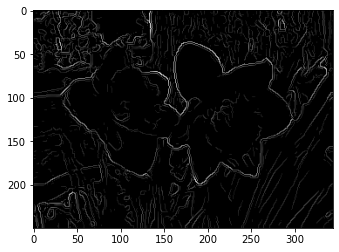

In [19]:
#Displaying Canny Edge image corresponding to 1st grayscale image
plt.imshow(Canny_Edge_images[0],cmap = plt.get_cmap('gray'))

In [20]:
#Defining a function to compute (p,q)th raw moment for a image

def raw_moments_computation(image_array,p,q):
    
    p=int(p) #Storing integer part of p 
    q=int(q) #Storing integer part of q
    height=len(image_array) #Computing height of the image
    width=len(image_array[0]) #Computing width of the image
    sum=0 #Setting sum as 0
    
    #For loop for computing (p,q)th raw moment for the image
    for l in range(height):
        for m in range(width):
            a=math.pow(l,p)*math.pow(m,q)*image_array[l,m] #Calculating (l^p)*(m^q)*(value corresponding to (l+1,m+1)th pixel)
            sum=sum+a #Calculating (p,q)th raw moment for the image
    
    return sum #Function will return (p,q)th raw moment for the image

In [21]:
m00_array=np.empty(number_images) #Initializing variable m00_array which will store sum of all pixel values for each Canny Edge image
                                    #It is same as initializing m00_array which will store (0,0)th raw moment for each Canny Edge image
m01_array=np.empty(number_images) #Initializing variable m01_array which will store (0,1)th raw moment for each Canny Edge image
m10_array=np.empty(number_images) #Initializing variable m10_array which will store (1,0)th raw moment for each Canny Edge image
m11_array=np.empty(number_images) #Initializing variable m11_array which will store (1,1)th raw moment for each Canny Edge image
m02_array=np.empty(number_images) #Initializing variable m02_array which will store (0,2)th raw moment for each Canny Edge image
m20_array=np.empty(number_images) #Initializing variable m20_array which will store (2,0)th raw moment for each Canny Edge image
m12_array=np.empty(number_images) #Initializing variable m12_array which will store (1,2)th raw moment for each Canny Edge image
m21_array=np.empty(number_images) #Initializing variable m21_array which will store (2,1)th raw moment for each Canny Edge image
m03_array=np.empty(number_images) #Initializing variable m03_array which will store (0,3)th raw moment for each Canny Edge image
m30_array=np.empty(number_images) #Initializing variable m30_array which will store (3,0)th raw moment for each Canny Edge image

#For loop for calculating sum of all pixel values i.e (0,0)th raw moment for each Canny Edge image
for i in range(number_images):
    img10=Canny_Edge_images[i] #Storing (i+1)th Canny Edge image in img10
    m00=np.sum(img10) #Calculating sum of all pixel values for (i+1)th Canny Edge image
    m00_array[i]=m00 #Storing sum of all pixel values for (i+1)th Canny Edge image

#For loop for computing (0,1)th, (1,0)th, (1,1)th, (0,2)th, (2,0)th, (1,2)th, (2,1)th, (0,3)th, (3,0)th raw moment for each Canny Edge image
for i in range(number_images):
    img11=Canny_Edge_images[i] #Storing (i+1)th Canny Edge image in img11
    m01=raw_moments_computation(img11,0,1) #Calling function raw_moments_computation to compute (0,1)th raw moment 
                                            #for (i+1)th Canny Edge image
    m10=raw_moments_computation(img11,1,0) #Calling function raw_moments_computation to compute (1,0)th raw moment 
                                            #for (i+1)th Canny Edge image
    m11=raw_moments_computation(img11,1,1) #Calling function raw_moments_computation to compute (1,1)th raw moment 
                                            #for (i+1)th Canny Edge image
    m02=raw_moments_computation(img11,0,2) #Calling function raw_moments_computation to compute (0,2)th raw moment 
                                            #for (i+1)th Canny Edge image
    m20=raw_moments_computation(img11,2,0) #Calling function raw_moments_computation to compute (2,0)th raw moment 
                                            #for (i+1)th Canny Edge image
    m12=raw_moments_computation(img11,1,2) #Calling function raw_moments_computation to compute (1,2)th raw moment 
                                            #for (i+1)th Canny Edge image
    m21=raw_moments_computation(img11,2,1) #Calling function raw_moments_computation to compute (2,1)th raw moment 
                                            #for (i+1)th Canny Edge image
    m03=raw_moments_computation(img11,0,3) #Calling function raw_moments_computation to compute (0,3)th raw moment 
                                            #for (i+1)th Canny Edge image
    m30=raw_moments_computation(img11,3,0) #Calling function raw_moments_computation to compute (3,0)th raw moment 
                                            #for (i+1)th Canny Edge image
    m01_array[i]=m01 #Storing (0,1)th raw moment for (i+1)th Canny Edge image
    m10_array[i]=m10 #Storing (1,0)th raw moment for (i+1)th Canny Edge image
    m11_array[i]=m11 #Storing (1,1)th raw moment for (i+1)th Canny Edge image
    m02_array[i]=m02 #Storing (0,2)th raw moment for (i+1)th Canny Edge image
    m20_array[i]=m20 #Storing (2,0)th raw moment for (i+1)th Canny Edge image
    m12_array[i]=m12 #Storing (1,2)th raw moment for (i+1)th Canny Edge image
    m21_array[i]=m21 #Storing (2,1)th raw moment for (i+1)th Canny Edge image
    m03_array[i]=m03 #Storing (0,3)th raw moment for (i+1)th Canny Edge image
    m30_array[i]=m30 #Storing (3,0)th raw moment for (i+1)th Canny Edge image

In [22]:
c11_array=np.empty(number_images) #Initializing variable c11_array which will store (1,1)th central  moment for each Canny Edge image
c20_array=np.empty(number_images) #Initializing variable c20_array which will store (2,0)th central  moment for each Canny Edge image
c02_array=np.empty(number_images) #Initializing variable c02_array which will store (0,2)th central  moment for each Canny Edge image
c21_array=np.empty(number_images) #Initializing variable c21_array which will store (2,1)th central  moment for each Canny Edge image
c12_array=np.empty(number_images) #Initializing variable c12_array which will store (1,2)th central  moment for each Canny Edge image
c30_array=np.empty(number_images) #Initializing variable c30_array which will store (3,0)th central  moment for each Canny Edge image
c03_array=np.empty(number_images) #Initializing variable c03_array which will store (0,3)th central  moment for each Canny Edge image

#For loop for computing (1,1)th, (2,0)th, (0,2)th, (2,1)th, (1,2)th, (3,0)th, (0,3)th central  moment for each Canny Edge image
for i in range(number_images):
    x_bar=(m10_array[i])/(m00_array[i]) #Calculating x_bar as (1,0)th raw moment/(0,0)th raw momemt for (i+1)th Canny Edge image
    y_bar=(m01_array[i])/(m00_array[i]) #Calculating y_bar as (0,1)th raw moment/(0,0)th raw momemt for (i+1)th Canny Edge image
    
    c11=(m11_array[i])-(x_bar*m01_array[i]) #Calculating (1,1)th central moment for (i+1)th Canny Edge image
    c20=(m20_array[i])-(x_bar*m10_array[i]) #Calculating (2,0)th central moment for (i+1)th Canny Edge image
    c02=(m02_array[i])-(y_bar*m01_array[i]) #Calculating (0,2)th central moment for (i+1)th Canny Edge image
    c21=(m21_array[i])-(2*x_bar*m11_array[i])-(y_bar*m20_array[i])+(2*x_bar*x_bar*m01_array[i]) 
    #Calculating (2,1)th central moment for (i+1)th Canny Edge image
    c12=(m12_array[i])-(2*y_bar*m11_array[i])-(x_bar*m02_array[i])+(2*y_bar*y_bar*m10_array[i])
    #Calculating (1,2)th central moment for (i+1)th Canny Edge image
    c30=(m30_array[i])-(3*x_bar*m20_array[i])+(2*x_bar*x_bar*m10_array[i])
    #Calculating (3,0)th central moment for (i+1)th Canny Edge image
    c03=(m03_array[i])-(3*y_bar*m02_array[i])+(2*y_bar*y_bar*m01_array[i])
    #Calculating (0,3)th central moment for (i+1)th Canny Edge image
    
    c11_array[i]=c11 #Storing (1,1)th central moment for (i+1)th Canny Edge image
    c20_array[i]=c20 #Storing (2,0)th central moment for (i+1)th Canny Edge image
    c02_array[i]=c02 #Storing (0,2)th central moment for (i+1)th Canny Edge image
    c21_array[i]=c21 #Storing (2,1)th central moment for (i+1)th Canny Edge image
    c12_array[i]=c12 #Storing (1,2)th central moment for (i+1)th Canny Edge image
    c30_array[i]=c30 #Storing (3,0)th central moment for (i+1)th Canny Edge image
    c03_array[i]=c03 #Storing (0,3)th central moment for (i+1)th Canny Edge image
    

In [23]:
hu11_array=np.empty(number_images) #Initializing variable hu11_array which will store (1,1)th hu moment for each Canny Edge image
hu20_array=np.empty(number_images) #Initializing variable hu20_array which will store (2,0)th hu moment for each Canny Edge image
hu02_array=np.empty(number_images) #Initializing variable hu02_array which will store (0,2)th hu moment for each Canny Edge image
hu21_array=np.empty(number_images) #Initializing variable hu21_array which will store (2,1)th hu moment for each Canny Edge image
hu12_array=np.empty(number_images) #Initializing variable hu12_array which will store (1,2)th hu moment for each Canny Edge image
hu30_array=np.empty(number_images) #Initializing variable hu30_array which will store (3,0)th hu moment for each Canny Edge image
hu03_array=np.empty(number_images) #Initializing variable hu03_array which will store (0,3)th hu moment for each Canny Edge image

#For loop for computing (1,1)th, (2,0)th, (0,2)th, (2,1)th, (1,2)th, (3,0)th, (0,3)th hu moment for each Canny Edge image
for i in range(number_images):
    hu11_array[i]=(c11_array[i])/(math.pow(m00_array[i],(1+((1+1)/2))))
    #Computing and storing (1,1)th hu moment for (i+1)th Canny Edge image
    hu20_array[i]=(c20_array[i])/(math.pow(m00_array[i],(1+((2+0)/2))))
    #Computing and storing (2,0)th hu moment for (i+1)th Canny Edge image
    hu02_array[i]=(c02_array[i])/(math.pow(m00_array[i],(1+((0+2)/2))))
    #Computing and storing (0,2)th hu moment for (i+1)th Canny Edge image
    hu21_array[i]=(c21_array[i])/(math.pow(m00_array[i],(1+((2+1)/2))))
    #Computing and storing (2,1)th hu moment for (i+1)th Canny Edge image
    hu12_array[i]=(c12_array[i])/(math.pow(m00_array[i],(1+((1+2)/2))))
    #Computing and storing (1,2)th hu moment for (i+1)th Canny Edge image
    hu30_array[i]=(c30_array[i])/(math.pow(m00_array[i],(1+((3+0)/2))))
    #Computing and storing (3,0)th hu moment for (i+1)th Canny Edge image
    hu03_array[i]=(c03_array[i])/(math.pow(m00_array[i],(1+((0+3)/2))))
    #Computing and storing (0,3)th hu moment for (i+1)th Canny Edge image

In [24]:
#Creating a 2-D array which will store all 7 hu moments corresponding to each Canny Edge image

hu_7_moments_array=np.empty((number_images,7)) #Initializing variable hu_7_moments_array which will store 
                                                #all 7 hu moments corresponding to each Canny Edge image
hu_7_moments_array[:,0]=hu11_array #The 1st column will store (1,1)th hu moment for each Canny Edge image
hu_7_moments_array[:,1]=hu20_array #The 2nd column will store (2,0)th hu moment for each Canny Edge image
hu_7_moments_array[:,2]=hu02_array #The 3rd column will store (0,2)th hu moment for each Canny Edge image
hu_7_moments_array[:,3]=hu21_array #The 4th column will store (2,1)th hu moment for each Canny Edge image
hu_7_moments_array[:,4]=hu12_array #The 5th column will store (1,2)th hu moment for each Canny Edge image
hu_7_moments_array[:,5]=hu30_array #The 6th column will store (3,0)th hu moment for each Canny Edge image
hu_7_moments_array[:,6]=hu03_array #The 7th column will store (0,3)th hu moment for each Canny Edge image

In [25]:
#Showing 7 hu moments corresponding to 1st Canny Edge image

hu_7_moments_array[0,:]

array([-5.01304143e-04,  5.68250880e-03,  9.99294553e-03, -5.73638671e-05,
       -4.95719336e-05,  1.38339481e-04,  1.72029440e-04])

In [26]:
#Creating a 2-D array which will store normalized 7 hu moments corresponding to each Canny Edge image

normalized_hu_7_moments_array=np.empty((number_images,7)) #Initializing variable normalized_hu_7_moments_array which will store 
                                                #normalized 7 hu moments corresponding to each Canny Edge image

#For loop for computing and storing normalized 7 hu moments corresponding to each Canny Edge image
for i in range(number_images):
    maximum=np.amax(hu_7_moments_array[i]) #Computing maximum of all 7 hu moments corresponding to (i+1)th Canny Edge image
    minimum=np.amin(hu_7_moments_array[i]) #Computing minimum of all 7 hu moments corresponding to (i+1)th Canny Edge image
    
    normalized_hu_7_moments_array[i]=(hu_7_moments_array[i]-minimum)/(maximum-minimum)
    #Computing and storing normalized 7 hu moments corresponding to (i+1)th Canny Edge image

In [27]:
#Showing normalized 7 hu moments corresponding to 1st Canny Edge image

normalized_hu_7_moments_array[0]

array([0.        , 0.58925727, 1.        , 0.04230319, 0.04304569,
       0.06095182, 0.06416215])

In [28]:
#Creating a 2-D array to store 47 feature values corresponding to each image

features_dataset=np.empty((number_images,47)) #Initializing variable features_dataset which will store 47 feature values corresponding to each image
features_dataset[:,0:7]=normalized_hu_7_moments_array
#The first 7 columns will store normalized 7 hu moments corresponding to each Canny Edge version of image
features_dataset[:,7:47]=dataset_histogram_normalized_RGBHS
#The next 40 columns will store noramlized histogram values of Red, Green, Blue, Hue and Saturation channels with 8 bins for each image



In [29]:
#Creating a output vector which contains name corresponding to flower in each image

species1=['Daffodil']*80 #The first 80 images have flower Daffodil
species2=['Snowdrop']*80 #81-160 images have flower Snowdrop
species3=['Lily Valley']*80 #161-240 images have flower Lily Valley
species4=['Bluebell']*80 #241-320 images have flower Bluebell

output_species=np.concatenate((species1,species2,species3,species4))
#Concatenating vectors species1, species2, species3, species4 to form output vector 
#which contains name corresponding to flower in each image

In [30]:
#Obtaining indices for which row of features_dataset and which observation of output_species is to be included
#in training, validation and test dataset

k1=80*1 #Calculating 80x1
k2=80*2 #Calculating 80x2
k3=80*3 #Calculating 80x3
k4=80*4 #Calculating 80x4

#We want to divide entire dataset into training and test data such that 
#80% of data is included in training and remaining 20% of data is included in test data

#In the dataset consisting of images there are 80 images corresponding to each name of flower
#80% of 80 is 64

range1=range(k1) #Obtaining range of integers from 0 to 79
range_random_1=random.sample(range1,64) 
#Obtaining randomly selected without replacement 64 integers from range of integers from 0 to 79
range_nonselect_1=[ele for ele in range1 if ele not in range_random_1] #Obtaining integers from 0 to 79 which are not selected
range2=range(k1,k2) #Obtaining range of integers from 80 to 159
range_random_2=random.sample(range2,64)
#Obtaining randomly selected without replacement 64 integers from range of integers from 80 to 159
range_nonselect_2=[ele for ele in range2 if ele not in range_random_2] #Obtaining integers from 80 to 159 which are not selected
range3=range(k2,k3) #Obtaining range of integers from 160 to 239
range_random_3=random.sample(range3,64)
#Obtaining randomly selected without replacement 64 integers from range of integers from 160 to 239
range_nonselect_3=[ele for ele in range3 if ele not in range_random_3] #Obtaining integers from 160 to 239 which are not selected
range4=range(k3,k4) #Obtaining range of integers from 240 to 319
range_random_4=random.sample(range4,64)
#Obtaining randomly selected without replacement 64 integers from range of integers from 240 to 319
range_nonselect_4=[ele for ele in range4 if ele not in range_random_4] #Obtaining integers from 240 to 319 which are not selected

#Training data will be divided into 2 parts training and validation data
#80% of training data will be in training part while remaining 20% of training data will be in validation part

#In training data there will be features corresponding to 64 images
#80% of 64 is approximately 51
range_training_1=random.sample(range_random_1,51)
#Obtaining randomly selected without replacement 51 integers from range of integers from range_random_1
range_validation_1=[ele for ele in range_random_1 if ele not in range_training_1]
#Obtaining integers from range_random_1 which are not selected
range_training_2=random.sample(range_random_2,51)
#Obtaining randomly selected without replacement 51 integers from range of integers from range_random_2
range_validation_2=[ele for ele in range_random_2 if ele not in range_training_2]
#Obtaining integers from range_random_2 which are not selected
range_training_3=random.sample(range_random_3,51)
#Obtaining randomly selected without replacement 51 integers from range of integers from range_random_3
range_validation_3=[ele for ele in range_random_3 if ele not in range_training_3]
#Obtaining integers from range_random_3 which are not selected
range_training_4=random.sample(range_random_4,51)
#Obtaining randomly selected without replacement 51 integers from range of integers from range_random_4
range_validation_4=[ele for ele in range_random_4 if ele not in range_training_4]
#Obtaining integers from range_random_4 which are not selected

In [31]:
range_training=np.concatenate((range_training_1,range_training_2,range_training_3,range_training_4))
#Obtaining indices for which row of features_dataset and which observation of output_species is to be included in training dataset

range_validation=np.concatenate((range_validation_1,range_validation_2,range_validation_3,range_validation_4),dtype=int)
#Obtaining indices for which row of features_dataset and which observation of output_species is to be included in validation dataset

range_test=np.concatenate((range_nonselect_1,range_nonselect_2,range_nonselect_3,range_nonselect_4))
#Obtaining indices for which row of features_dataset and which observation of output_species is to be included in test dataset

x_train=features_dataset[range_training]
#Obtaining input data (which consists of features) corresponding to training data
y_train=output_species[range_training]
#Obtaining output data (which consists of name of flower) corresponding to training data

x_validation=features_dataset[range_validation]
#Obtaining input data (which consists of features) corresponding to validation data
y_validation=output_species[range_validation]
#Obtaining output data (which consists of name of flower) corresponding to validation data

x_test=features_dataset[range_test]
#Obtaining input data (which consists of features) corresponding to test data
y_test=output_species[range_test]
#Obtaining output data (which consists of name of flower) corresponding to test data

In [32]:
#Now we will consider Machine Learning (ML) models for Classification as
#Support Vector Classification (SVC) for multiclass classification with kernel as 'poly', i.e, polynomial kernel
#Random Forest Classification for multiclass classification
#Decision Tree Classification for multiclass classification with criterion as 'entropy'
#K Nearest Neighbor Classification for multiclass classification with distance metric as 'minkowski' and power parameter as 2

#We will consider various choices of hyperparameters and fit all considered ML models fir training data
#and compute average f1 score for SVC and average accuracy score for other models for validation data 
#Average of f1 score and average of accuracy score is computed over 20 trials

In [33]:
#We will consider Support Vector Classification (SVC) for multiclass classification with polynomial kernel

In [34]:
#Considering Support Vector Classification (SVC) for multiclass classification with polynomial kernel

#From scikit-learn import svm
from sklearn import svm
#Import scikit-learn.model_selection as model_selection
import sklearn.model_selection as model_selection
#From scikit-learn.metrics import f1_score
from sklearn.metrics import f1_score

#First we will consider hyperparameter as C

number_trials=np.arange(0,20) #Consider number of trials as 20, i.e, from 0 to 19
C_log_value=np.arange(-10,10) #Consider log C value as integers from -10 to 9
number_parameters=C_log_value.shape[0] #Computing number of values of hyperparameter C
f1score=np.empty((number_parameters,number_trials.shape[0]))
#Initializing 2-D array which will store f1 score for various values of hyperparameter and trials

#For loop for computing f1 score for various values of hyperparameter and trials
for i in range(number_parameters):
    for j in number_trials:
        svc=svm.SVC(kernel='poly', C=np.exp(C_log_value[i])) #Building SVC model with polynomial kernel and 
                                                            #C as exponential of (i+1)th value from C_log_value
        svc=svc.fit(x_train,y_train) #Fitting above builded SVC model for training data
        y_pred=svc.predict(x_validation) #Prediciting output for validation data
        f1score[i,j]=f1_score(y_validation,y_pred, average='micro') 
        #Computing and storing f1 score using average as micro for validation data for various values of hyperparameter and trials

average_f1score=np.mean(f1score,1) 
#Obtaining average f1 score for validation data 
#for various values of hyperparameter where average is computed over number of trials

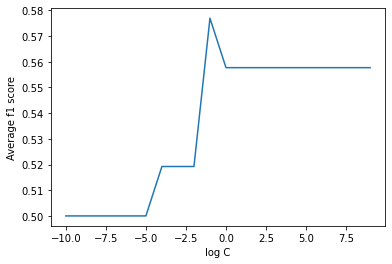

In [35]:
#For various values of log C considered above we will look at how average f1 score changes

x=C_log_value #We take log C values on X-axis
y=average_f1score #We take average f1 score on Y-axis
plt.plot(x, y) #We plot values of Y-axis versus X-axis
plt.xlabel('log C') #We label X-axis
plt.ylabel('Average f1 score') #We label Y-axis
plt.show() #To show the graph

In [ ]:
#Before log C = 0, average f1 score has increasing trend. This indicates that before log C = 0 there is underfitting
#After log C = 0, average f1 score does not change significantly
#Thus the best value of log C is 0
#Thus the best value of hyperparameter C is 1

In [36]:
#Now we will consider hyperparameter as degree

number_trials=np.arange(0,20) #Consider number of trials as 20, i.e, from 0 to 19
degree_value=np.arange(1,15) #Consider value of degree as integers from 1 to 14
number_parameters=degree_value.shape[0] #Computing number of values of hyperparameter degree
f1score=np.empty((number_parameters,number_trials.shape[0]))
#Initializing 2-D array which will store f1 score for various values of hyperparameter and trials

#For loop for computing f1 score for various values of hyperparameter and trials
for i in range(number_parameters):
    for j in number_trials:
        svc=svm.SVC(kernel='poly', C=1, degree=degree_value[i]) #Building SVC model with polynomial kernel, C=1 
                                                               #and degree as (i+1)th value from degree_value
        svc=svc.fit(x_train,y_train) #Fitting above builded SVC model for training data
        y_pred=svc.predict(x_validation) #Prediciting output for validation data
        f1score[i,j]=f1_score(y_validation,y_pred, average='micro')
         #Computing and storing f1 score using average as micro for validation data for various values of hyperparameter and trials

average_f1score=np.mean(f1score,1)
#Obtaining average f1 score for validation data 
#for various values of hyperparameter where average is computed over number of trials

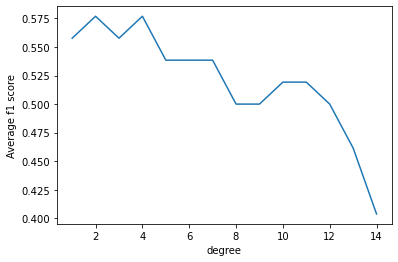

In [37]:
#For various values of degree considered above we will look at how average f1 score changes

x=degree_value #We take values of degree on X-axis
y=average_f1score #We take average f1 score on Y-axis
plt.plot(x, y) #We plot values of Y-axis versus X-axis
plt.xlabel('degree') #We label X-axis
plt.ylabel('Average f1 score') #We label Y-axis
plt.show() #To show the graph

In [ ]:
#After degree = 3 of polynomial kernel, average f1 score has decreasing trend. 
#This indicates that after degree =3 there is overfitting.
#Thus the best value of hyperparameter degree of polynomial kernel is 3

In [38]:
#Now we will work on test data

svc=svm.SVC(kernel='poly', C=1, degree=3) #Building SVC model with polynomial kernel, C=1 and degree as 3
svc.fit(x_train,y_train) #Fitting above builded SVC model for training data
y_pred_test=svc.predict(x_test) #Prediciting output for test data
f1score=f1_score(y_test,y_pred_test, average='micro') #Computing and storing f1 score using average as micro for test data
print("f1 score for test data is:",f1score) #Printing computed f1 score for test data

f1 score for test data is: 0.71875


In [39]:
#We will consider Random Forest Classification for multiclass classification

In [40]:
#Considering Random Forest Classification for multiclass classification

#From scikit-learn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#From scikit-learn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

#First we will consider hyperparameter as number of trees

number_trials=np.arange(0,20) #Consider number of trials as 20, i.e, from 0 to 19
number_trees=np.asarray([10,50,100,200,500]) #Consider number of trees as 10, 50, 100, 200, 500
number_parameters=number_trees.shape[0] #Computing number of values of hyperparameter number of trees
accuracy_random_forest=np.empty((number_parameters,number_trials.shape[0])) 
#Initializing 2-D array which will store accuracy score for various values of hyperparameter and trials

#For loop for computing accuracy score for various values of hyperparameter and trials
for i in range(number_parameters):
    for j in number_trials:
        random_forest=RandomForestClassifier(n_estimators=number_trees[i]) #Building Random Forest Classification model 
                                                                        #with number of trees as (i+1)th value from number_trees                            
        random_forest=random_forest.fit(x_train,y_train) #Fitting above builded Random Forest Classification model for training data
        y_pred=random_forest.predict(x_validation) #Prediciting output for validation data
        accuracy_random_forest[i,j]=accuracy_score(y_validation,y_pred)
        #Computing and storing accuracy score for validation data for various values of hyperparameter and trials

average_accuracy=np.mean(accuracy_random_forest,1)
#Obtaining average accuracy score for validation data 
#for various values of hyperparameter where average is computed over number of trials

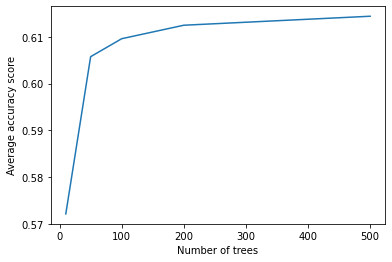

In [41]:
#For various values of number of trees considered above we will look at how average accuracy score changes

x=number_trees #We take values of number of trees on X-axis
y=average_accuracy #We take average accuracy score on Y-axis
plt.plot(x, y) #We plot values of Y-axis versus X-axis
plt.xlabel('Number of trees') #We label X-axis
plt.ylabel('Average accuracy score') #We label Y-axis
plt.show() #To show the graph

In [ ]:
#Before number of trees = 200, average accuracy score has increasing trend. 
#This indicates that before number of trees = 200 there is underfitting.
#After number of trees = 200, there is no significant change in average accuracy score.
#Thus, the best choice for hyperparameter number of trees is 200

In [42]:
#Now we will consider hyperparameter as tree depth

number_trials=np.arange(0,20) #Consider number of trials as 20, i.e, from 0 to 19
tree_depth=np.asarray([1,5,10,15,20]) #Consider tree depth as 1, 5, 10, 15, 20
number_parameters=tree_depth.shape[0] #Computing number of values of hyperparameter tree depth
accuracy_random_forest=np.empty((number_parameters,number_trials.shape[0]))
#Initializing 2-D array which will store accuracy score for various values of hyperparameter and trials

#For loop for computing accuracy score for various values of hyperparameter and trials
for i in range(number_parameters):
    for j in number_trials:
        random_forest=RandomForestClassifier(n_estimators=200, max_depth=tree_depth[i]) 
        #Building Random Forest Classification model with number of trees as 200 and tree depth as (i+1)th value from tree_depth
        random_forest=random_forest.fit(x_train,y_train) #Fitting above builded Random Forest Classification model for training data
        y_pred=random_forest.predict(x_validation) #Prediciting output for validation data
        accuracy_random_forest[i,j]=accuracy_score(y_validation,y_pred)
        #Computing and storing accuracy score for validation data for various values of hyperparameter and trials
        
average_accuracy=np.mean(accuracy_random_forest,1)
#Obtaining average accuracy score for validation data 
#for various values of hyperparameter where average is computed over number of trials

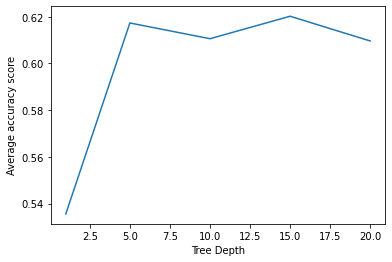

In [43]:
#For various values of tree depth considered above we will look at how average accuracy score changes

x=tree_depth #We take values of tree depth on X-axis
y=average_accuracy #We take average accuracy score on Y-axis
plt.plot(x, y) #We plot values of Y-axis versus X-axis
plt.xlabel('Tree Depth') #We label X-axis
plt.ylabel('Average accuracy score') #We label Y-axis
plt.show() #To show the graph

In [ ]:
#Before tree depth = 10, average accuracy score has increasing trend. 
#This indicates that before tree depth = 10, there is underfitting.
#After tree depth = 10, average accuracy score does not change significantly.
#Thus, best choice for hyperparameter tree depth is 10.

In [44]:
#Now we will work on test data

random_forest=RandomForestClassifier(n_estimators=200, max_depth=10)
#Building Random Forest Classification model with number of trees as 200 and tree depth as 10
random_forest=random_forest.fit(x_train,y_train) #Fitting above builded Random Forest Classification model for training data
y_pred_test=random_forest.predict(x_test) #Prediciting output for test data

accuracy=accuracy_score(y_test,y_pred_test) #Computing and storing accuracy score for test data
print("Accuracy for test data is:",accuracy) #Printing computed accuracy score for test data

Accuracy for test data is: 0.734375


In [45]:
#We will consider Decision Tree Classification for multiclass classification with criterion as 'entropy'

In [46]:
#Considering Decision Tree Classification for multiclass classification with criterion as 'entropy'

#From scikit-learn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#From scikit-learn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

#We will consider hyperparameter as tree depth

number_trials=np.arange(0,20) #Consider number of trials as 20, i.e, from 0 to 19
tree_depth=np.asarray([1,3,5,10,15,20]) #Consider tree depth as 1, 3, 5, 10, 15, 20
number_parameters=tree_depth.shape[0] #Computing number of values of hyperparameter tree depth
accuracy_decision_tree=np.empty((number_parameters,number_trials.shape[0]))
#Initializing 2-D array which will store accuracy score for various values of hyperparameter and trials

#For loop for computing accuracy score for various values of hyperparameter and trials
for i in range(number_parameters):
    for j in number_trials:
        decision_tree=DecisionTreeClassifier(criterion='entropy', max_depth=tree_depth[i])
        #Building Decision Tree Classification model with citerion as 'entropy' and tree depth as (i+1)th value from tree_depth
        decision_tree=decision_tree.fit(x_train,y_train) #Fitting above builded Decision Tree Classification model for training data
        y_pred=decision_tree.predict(x_validation) #Prediciting output for validation data
        accuracy_decision_tree[i,j]=accuracy_score(y_validation,y_pred)
        #Computing and storing accuracy score for validation data for various values of hyperparameter and trials

average_accuracy=np.mean(accuracy_decision_tree,1)
#Obtaining average accuracy score for validation data 
#for various values of hyperparameter where average is computed over number of trials

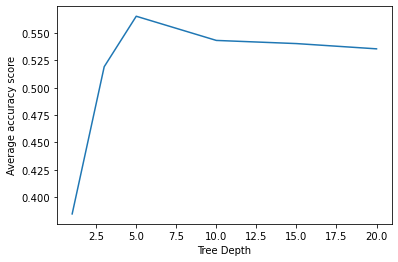

In [47]:
#For various values of tree depth considered above we will look at how average accuracy score changes

x=tree_depth #We take values of tree depth on X-axis
y=average_accuracy #We take average accuracy score on Y-axis
plt.plot(x, y) #We plot values of Y-axis versus X-axis
plt.xlabel('Tree Depth') #We label X-axis
plt.ylabel('Average accuracy score') #We label Y-axis
plt.show() #To show the graph

In [ ]:
#Before tree depth = 5, average accuracy score has increasing trend. This indicates that before tree depth = 5, there is underfitting.
#After tree depth = 5, average accuracy score has decreasing trend. This indicates that after tree depth = 5, there is overfitting.
#Thus best choice of hyperparameter tree depth is 5

In [48]:
#Now we will work on test data

decision_tree=DecisionTreeClassifier(criterion='entropy', max_depth=5)
#Building Decision Tree Classification model with citerion as 'entropy' and tree depth as 5
decision_tree=decision_tree.fit(x_train,y_train) #Fitting above builded Decision Tree Classification model for training data
y_pred_test=decision_tree.predict(x_test) #Prediciting output for test data

accuracy=accuracy_score(y_test,y_pred_test) #Computing and storing accuracy score for test data
print("Accuracy for test data is:",accuracy) #Printing computed accuracy score for test data

Accuracy for test data is: 0.578125


In [49]:
#We will consider K Nearest Neighbor Classification for multiclass classification with distance metric as 'minkowski' and power parameter as 2

In [50]:
#Considering K Nearest Neighbor Classification for multiclass classification with distance metric as 'minkowski' and power parameter as 2

#From scikit-learn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#From scikit-learn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

#We will consider hyperparameter as number of neighbors

number_trials=np.arange(0,20) #Consider number of trials as 20, i.e, from 0 to 19
number_neighbours=np.arange(1,21) #Consider  number of neighbors as integer from 1 to 20
number_parameters=number_neighbours.shape[0] #Computing number of values of hyperparameter number of neighbors
accuracy_knn=np.empty((number_parameters,number_trials.shape[0]))
#Initializing 2-D array which will store accuracy score for various values of hyperparameter and trials

#For loop for computing accuracy score for various values of hyperparameter and trials
for i in range(number_parameters):
    for j in number_trials:
        knn=KNeighborsClassifier(n_neighbors=number_neighbours[i], metric='minkowski', p=2)
        #Building K Nearest Neighbor Classification model with distance metric as 'minkowski', power parameter as 2  
        #and number of neighbors as (i+1)th value from number_neighbours
        knn=knn.fit(x_train, y_train) #Fitting above builded K Nearest Neighbor Classification model for training data
        y_pred=knn.predict(x_validation) #Prediciting output for validation data
        accuracy_knn[i,j]=accuracy_score(y_validation, y_pred)
        #Computing and storing accuracy score for validation data for various values of hyperparameter and trials
        
average_accuracy=np.mean(accuracy_knn,1)
#Obtaining average accuracy score for validation data 
#for various values of hyperparameter where average is computed over number of trials

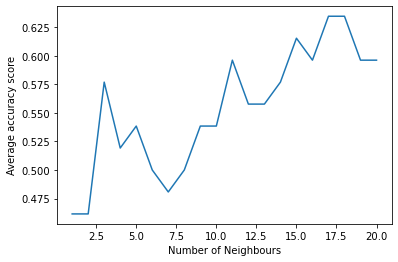

In [51]:
#For various values of number of neighbors considered above we will look at how average accuracy score changes

x=number_neighbours #We take values of number of neighbors on X-axis
y=average_accuracy #We take average accuracy score on Y-axis
plt.plot(x, y) #We plot values of Y-axis versus X-axis
plt.xlabel('Number of Neighbours') #We label X-axis
plt.ylabel('Average accuracy score') #We label Y-axis
plt.show() #To show the graph

In [ ]:
#Before number of neighbors = 17, average accuracy score has increasing trend.
#This indicates there is underfitting before number of neighbors = 17.
#After number of neighbors = 17, average accuracy score has decreasing trend.
#This indicates there is overfitting after number of neighbors = 17.
#Thus best choice of hyperparameter number of neighbors is 17

In [52]:
#Now we will work on test data

knn=KNeighborsClassifier(n_neighbors=17, metric='minkowski', p=2)
#Building K Nearest Neighbor Classification model with distance metric as 'minkowski', power parameter as 2  
#and number of neighbors as 17
knn=knn.fit(x_train, y_train) #Fitting above builded K Nearest Neighbor Classification model for training data
y_pred_test=knn.predict(x_test)  #Prediciting output for test data
accuracy=accuracy_score(y_test, y_pred_test) #Computing and storing accuracy score for test data
print("Accuracy for test data is:",accuracy) #Printing computed accuracy score for test data

Accuracy for test data is: 0.5625
